In [208]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [209]:
train_data = pd.read_csv('train_data.csv')
test_points = pd.read_csv('test_points.csv')

In [210]:
print(train_data.head())
print(test_points.head())

        Lat      Long_  Deaths  Case_Fatality_Ratio
0  33.93911  67.709953     NaN             3.779217
1  41.15330  20.168300     NaN             1.077234
2  28.03390   1.659600     NaN             2.536905
3  42.50630   1.521800   165.0             0.345543
4 -11.20270  17.873900     NaN             1.836434
       Lat     Long_
0  41.1533   20.1683
1 -71.9499   23.3470
2 -35.4735  149.0124
3 -34.9285  138.6007
4  47.5162   14.5501


In [211]:
# Handle missing values
train_data.fillna(train_data.median(), inplace=True)

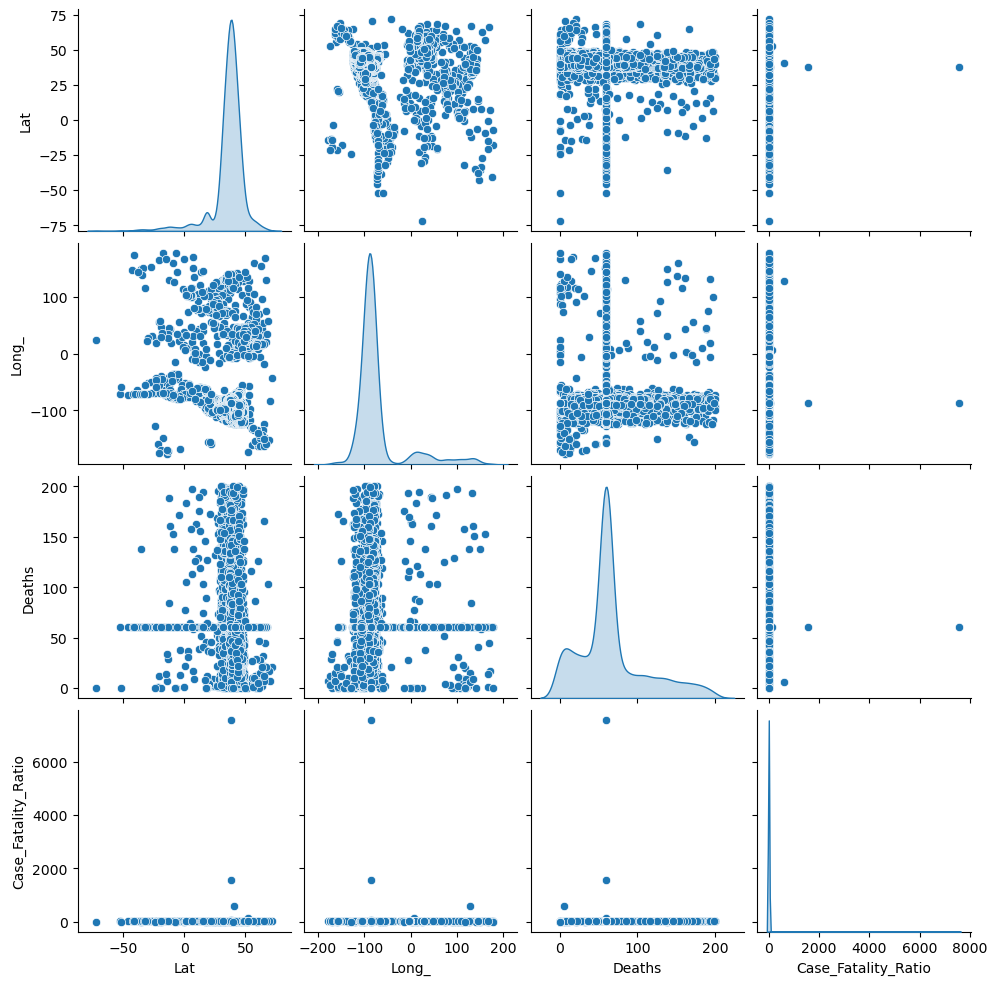

In [212]:
sns.pairplot(train_data, diag_kind="kde")
plt.show()

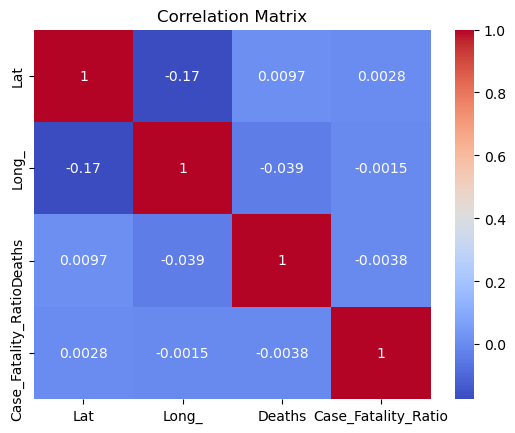

In [213]:
# Visualize data distribution
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [214]:
print(train_data.columns)

Index(['Lat', 'Long_', 'Deaths', 'Case_Fatality_Ratio'], dtype='object')


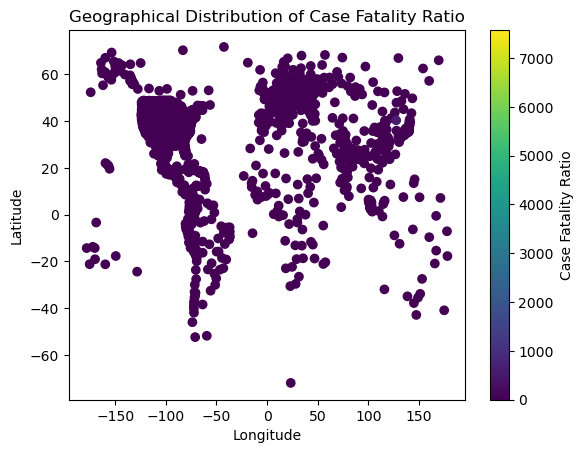

In [215]:
plt.scatter(train_data['Long_'], train_data['Lat'], c=train_data['Case_Fatality_Ratio'], cmap='viridis')
plt.colorbar(label="Case Fatality Ratio")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Case Fatality Ratio")
plt.show()

In [216]:
# Correct column names and handle missing columns
X = train_data.drop(columns=["Deaths", "Case_Fatality_Ratio"])
y_deaths = train_data["Deaths"]
y_cfr = train_data["Case_Fatality_Ratio"]

In [217]:
# Display the prepared data
print("Features (X):")
print(X.head())
print("\nTarget (y_deaths):")
print(y_deaths.head())
print("\nTarget (y_cfr):")
print(y_cfr.head())

Features (X):
        Lat      Long_
0  33.93911  67.709953
1  41.15330  20.168300
2  28.03390   1.659600
3  42.50630   1.521800
4 -11.20270  17.873900

Target (y_deaths):
0     60.0
1     60.0
2     60.0
3    165.0
4     60.0
Name: Deaths, dtype: float64

Target (y_cfr):
0    3.779217
1    1.077234
2    2.536905
3    0.345543
4    1.836434
Name: Case_Fatality_Ratio, dtype: float64


In [218]:
# Split data
X_train, X_val, y_train_deaths, y_val_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

In [219]:
# Check for NaN or infinite values
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("X_train contains NaN or infinite values.")

In [220]:
# Replace NaN or inf with the mean or a placeholder (e.g., 0)
X_train = np.nan_to_num(X_train, nan=0, posinf=1e10, neginf=-1e10)


In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model_deaths.fit(X_train_scaled, y_train_deaths)


RandomForestRegressor(random_state=42)

In [222]:
# Train Random Forest for deaths
model_deaths = RandomForestRegressor(random_state=42)
model_deaths.fit(X_train, y_train_deaths)

RandomForestRegressor(random_state=42)

In [223]:
# Validate
y_pred_deaths = model_deaths.predict(X_val)
rmse_deaths = np.sqrt(mean_squared_error(y_val_deaths, y_pred_deaths))
print(f"RMSE for Deaths Prediction: {rmse_deaths}")

RMSE for Deaths Prediction: 38.17108918503576


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [224]:
test_predictions_deaths = model_deaths.predict(test_points)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [225]:
submission = test_points.copy()
submission["Predicted_Deaths"] = test_predictions_deaths

In [226]:
submission.to_csv("submission.csv", index=False)
print("Submission saved!")

Submission saved!


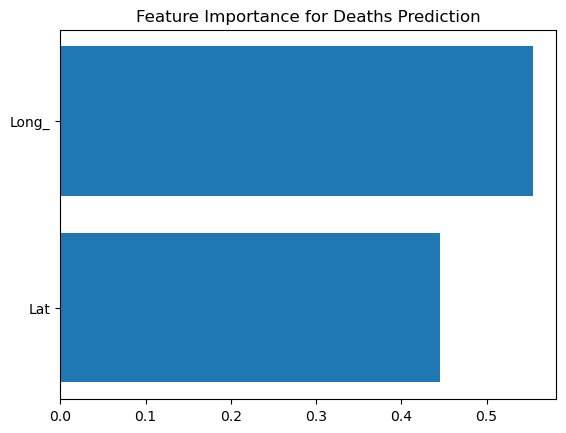

In [227]:
# Feature importance visualization
importances = model_deaths.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance for Deaths Prediction")
plt.show()

# Logic explanation as text or markdown cells


In [228]:
print(train_data.columns)

Index(['Lat', 'Long_', 'Deaths', 'Case_Fatality_Ratio'], dtype='object')


In [229]:
train_data["Confirmed_Cases"] = train_data["Deaths"] / (train_data["Case_Fatality_Ratio"] / 100)


In [230]:
# Calculate Confirmed Cases
train_data["Confirmed_Cases"] = train_data["Deaths"] / (train_data["Case_Fatality_Ratio"] / 100)

# Check the updated dataset
print(train_data.head())


        Lat      Long_  Deaths  Case_Fatality_Ratio  Confirmed_Cases
0  33.93911  67.709953    60.0             3.779217      1587.630573
1  41.15330  20.168300    60.0             1.077234      5569.822025
2  28.03390   1.659600    60.0             2.536905      2365.086470
3  42.50630   1.521800   165.0             0.345543     47751.000004
4 -11.20270  17.873900    60.0             1.836434      3267.202072


In [231]:
# Features (X) remain the same
X = train_data.drop(columns=["Deaths", "Confirmed_Cases", "Case_Fatality_Ratio"])

# Targets
y_deaths = train_data["Deaths"]
y_cases = train_data["Confirmed_Cases"]
y_cfr = train_data["Case_Fatality_Ratio"]

# Split the data for each target
X_train, X_val, y_train_deaths, y_val_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)
X_train_cases, X_val_cases, y_train_cases, y_val_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)
X_train_cfr, X_val_cfr, y_train_cfr, y_val_cfr = train_test_split(X, y_cfr, test_size=0.2, random_state=42)


In [232]:
# Check for NaN values in target variables
print("NaN values in y_deaths:", y_deaths.isna().sum())
print("NaN values in y_cases:", y_cases.isna().sum())
print("NaN values in y_cfr:", y_cfr.isna().sum())


NaN values in y_deaths: 0
NaN values in y_cases: 132
NaN values in y_cfr: 0


In [233]:
# Drop rows with NaN values in any of the target columns
train_data_clean = train_data.dropna(subset=['Deaths', 'Confirmed_Cases', 'Case_Fatality_Ratio'])

# Re-define X and y after cleaning
X_clean = train_data_clean[['Lat', 'Long_']]
y_deaths_clean = train_data_clean['Deaths']
y_cases_clean = train_data_clean['Confirmed_Cases']
y_cfr_clean = train_data_clean['Case_Fatality_Ratio']

# Re-split the data for training
X_train_clean, X_val_clean, y_train_deaths_clean, y_val_deaths_clean = train_test_split(X_clean, y_deaths_clean, test_size=0.2, random_state=42)
X_train_cases_clean, X_val_cases_clean, y_train_cases_clean, y_val_cases_clean = train_test_split(X_clean, y_cases_clean, test_size=0.2, random_state=42)
X_train_cfr_clean, X_val_cfr_clean, y_train_cfr_clean, y_val_cfr_clean = train_test_split(X_clean, y_cfr_clean, test_size=0.2, random_state=42)


In [234]:
# Check for infinite values in the target variable
print("Infinite values in y_cases_clean:", np.isinf(y_cases_clean).sum())
print("Extreme values in y_cases_clean:", (y_cases_clean > 1e10).sum())


Infinite values in y_cases_clean: 1
Extreme values in y_cases_clean: 1


In [235]:
# Replace infinite values with the mean of the column
y_cases_clean = np.where(np.isinf(y_cases_clean), y_cases_clean.mean(), y_cases_clean)

# Optional: You could also replace values that are too large
y_cases_clean = np.where(y_cases_clean > 1e10, y_cases_clean.mean(), y_cases_clean)


In [236]:
# Check for infinite values and extremely large numbers
import numpy as np

# Find indices where y contains Inf or very large values
inf_indices = np.isinf(y_cases_clean)
large_values_indices = y_cases_clean > 1e10

# Print the counts of such values
print(f"Infinite values in y_cases_clean: {np.sum(inf_indices)}")
print(f"Extreme values in y_cases_clean (> 1e10): {np.sum(large_values_indices)}")

# If you want to see the actual rows with these values
print("Rows with infinite values:", y_cases_clean[inf_indices])
print("Rows with large values:", y_cases_clean[large_values_indices])


Infinite values in y_cases_clean: 1
Extreme values in y_cases_clean (> 1e10): 1
Rows with infinite values: [inf]
Rows with large values: [inf]


In [237]:
# Replace Inf values with the median of the non-Inf values
y_cases_clean = np.where(np.isinf(y_cases_clean), np.nan, y_cases_clean)
y_cases_clean = np.where(np.isnan(y_cases_clean), np.nanmedian(y_cases_clean), y_cases_clean)

# Re-split the data
X_train_clean, X_val_clean, y_train_cases_clean, y_val_cases_clean = train_test_split(X_clean, y_cases_clean, test_size=0.2, random_state=42)

# Train the model again
model_cases = RandomForestRegressor(random_state=42)
model_cases.fit(X_train_clean, y_train_cases_clean)


RandomForestRegressor(random_state=42)

In [238]:
# Remove rows with Inf or large values in y_cases_clean
train_data_clean = train_data_clean[~(inf_indices | large_values_indices)]

# Re-define X and y after cleaning
X_clean = train_data_clean[['Lat', 'Long_']]
y_cases_clean = train_data_clean['Confirmed_Cases']

# Re-split the data
X_train_clean, X_val_clean, y_train_cases_clean, y_val_cases_clean = train_test_split(X_clean, y_cases_clean, test_size=0.2, random_state=42)

# Train the model again
model_cases = RandomForestRegressor(random_state=42)
model_cases.fit(X_train_clean, y_train_cases_clean)


RandomForestRegressor(random_state=42)

In [239]:
train_data_clean.columns


Index(['Lat', 'Long_', 'Deaths', 'Case_Fatality_Ratio', 'Confirmed_Cases'], dtype='object')

In [240]:
# Re-define X and y for CFR
X_clean = train_data_clean[['Lat', 'Long_']]
y_cfr_clean = train_data_clean['Case_Fatality_Ratio']


In [241]:
# Re-split the data for CFR
X_train_clean, X_val_clean, y_train_cfr_clean, y_val_cfr_clean = train_test_split(X_clean, y_cfr_clean, test_size=0.2, random_state=42)

# Train Random Forest for CFR
model_cfr = RandomForestRegressor(random_state=42)
model_cfr.fit(X_train_clean, y_train_cfr_clean)

# Predict on the validation set for CFR
y_pred_cfr = model_cfr.predict(X_val_clean)


In [242]:
# Re-define X and y for Confirmed Cases
y_cases_clean = train_data_clean['Confirmed_Cases']

# Re-split the data for Confirmed Cases
X_train_cases_clean, X_val_cases_clean, y_train_cases_clean, y_val_cases_clean = train_test_split(X_clean, y_cases_clean, test_size=0.2, random_state=42)

# Train Random Forest for Confirmed Cases
model_cases = RandomForestRegressor(random_state=42)
model_cases.fit(X_train_cases_clean, y_train_cases_clean)

# Predict on the validation set for Confirmed Cases
y_pred_cases = model_cases.predict(X_val_cases_clean)


In [243]:
# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate CFR model
mae_cfr = mean_absolute_error(y_val_cfr_clean, y_pred_cfr)
mse_cfr = mean_squared_error(y_val_cfr_clean, y_pred_cfr)
r2_cfr = r2_score(y_val_cfr_clean, y_pred_cfr)

# Evaluate Confirmed Cases model
mae_cases = mean_absolute_error(y_val_cases_clean, y_pred_cases)
mse_cases = mean_squared_error(y_val_cases_clean, y_pred_cases)
r2_cases = r2_score(y_val_cases_clean, y_pred_cases)

print(f'CFR Model - MAE: {mae_cfr}, MSE: {mse_cfr}, R²: {r2_cfr}')
print(f'Confirmed Cases Model - MAE: {mae_cases}, MSE: {mse_cases}, R²: {r2_cases}')


CFR Model - MAE: 2.4255333064469515, MSE: 278.65777682684256, R²: -10.477956205963398
Confirmed Cases Model - MAE: 4179.687537070667, MSE: 105253554.56769255, R²: 0.3089093276256112


In [244]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV for CFR
grid_search_cfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_cfr.fit(X_train_clean, y_train_cfr_clean)

# Best parameters for CFR model
print("Best parameters for CFR model:", grid_search_cfr.best_params_)

# Set up GridSearchCV for Confirmed Cases
grid_search_cases = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_cases.fit(X_train_cases_clean, y_train_cases_clean)

# Best parameters for Confirmed Cases model
print("Best parameters for Confirmed Cases model:", grid_search_cases.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for CFR model: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Confirmed Cases model: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [245]:
from sklearn.model_selection import train_test_split

# Assuming train_data_clean is your cleaned data
X = train_data_clean[['Lat', 'Long_']]
y_cfr = train_data_clean['Case_Fatality_Ratio']
y_cases = train_data_clean['Confirmed_Cases']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train_cfr, y_test_cfr = train_test_split(X, y_cfr, test_size=0.2, random_state=42)
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)


In [246]:
# Evaluate the models on the test set
y_pred_test_cfr = model_cfr.predict(X_test)
y_pred_test_cases = model_cases.predict(X_test)

# Evaluate performance metrics
mae_test_cfr = mean_absolute_error(y_test_cfr, y_pred_test_cfr)
mse_test_cfr = mean_squared_error(y_test_cfr, y_pred_test_cfr)
r2_test_cfr = r2_score(y_test_cfr, y_pred_test_cfr)

mae_test_cases = mean_absolute_error(y_test_cases, y_pred_test_cases)
mse_test_cases = mean_squared_error(y_test_cases, y_pred_test_cases)
r2_test_cases = r2_score(y_test_cases, y_pred_test_cases)

print(f'Test Set - CFR Model - MAE: {mae_test_cfr}, MSE: {mse_test_cfr}, R²: {r2_test_cfr}')
print(f'Test Set - Confirmed Cases Model - MAE: {mae_test_cases}, MSE: {mse_test_cases}, R²: {r2_test_cases}')


Test Set - CFR Model - MAE: 2.4255333064469515, MSE: 278.65777682684256, R²: -10.477956205963398
Test Set - Confirmed Cases Model - MAE: 4179.687537070667, MSE: 105253554.56769255, R²: 0.3089093276256112


In [247]:
import joblib

# Save models
joblib.dump(model_cfr, 'model_cfr.pkl')
joblib.dump(model_cases, 'model_cases.pkl')

# You can later load them using:
# model_cfr = joblib.load('model_cfr.pkl')
# model_cases = joblib.load('model_cases.pkl')


['model_cases.pkl']

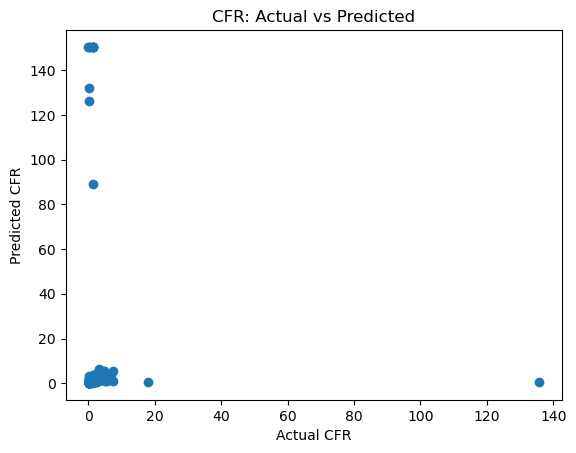

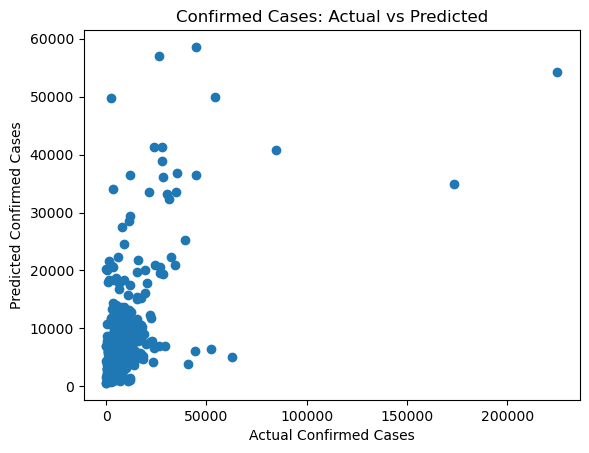

In [248]:
import matplotlib.pyplot as plt

# Visualization for CFR model
plt.scatter(y_val_cfr_clean, y_pred_cfr)
plt.xlabel('Actual CFR')
plt.ylabel('Predicted CFR')
plt.title('CFR: Actual vs Predicted')
plt.show()

# Visualization for Confirmed Cases model
plt.scatter(y_val_cases_clean, y_pred_cases)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Confirmed Cases: Actual vs Predicted')
plt.show()


In [249]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train_cases)  # Example for confirmed cases model
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [250]:
from sklearn.model_selection import cross_val_score

cv_scores_cfr = cross_val_score(model_cfr, X_train, y_train_cfr, cv=5, scoring='neg_mean_squared_error')
cv_scores_cases = cross_val_score(model_cases, X_train, y_train_cases, cv=5, scoring='neg_mean_squared_error')

print(f'CFR Model - Cross-Validation MSE: {cv_scores_cfr.mean()}')
print(f'Confirmed Cases Model - Cross-Validation MSE: {cv_scores_cases.mean()}')


CFR Model - Cross-Validation MSE: -19812.92271625212
Confirmed Cases Model - Cross-Validation MSE: -58341706.99294646


In [251]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


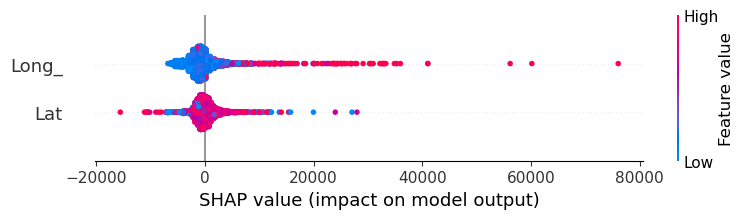

In [252]:
import shap

explainer = shap.TreeExplainer(model_cases)  # Using the model for confirmed cases
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


In [253]:
import joblib
joblib.dump(model_cases, 'confirmed_cases_model.pkl')
joblib.dump(model_cfr, 'cfr_model.pkl')


['cfr_model.pkl']